In [12]:
# thanks to  https://realpython.com/pandas-groupby/
import pandas as pd
import load_data
import seaborn as sns
import matplotlib.pyplot as plt
rank = load_data.load_ranking()
players = load_data.load_players()
rank

,id,name,elo,title,date
0,1701991,"Aaberg, Anton",2300.0,NaN,2001-01-01
1,1401815,"Aagaard, Jacob",2374.0,im,2001-01-01
2,1500503,"Aarland, Stein Arild",2275.0,NaN,2001-01-01
3,5000092,"Aaron, Manuel",2315.0,im,2001-01-01
4,5004373,"Aarthie, Ramaswamy",2250.0,wim,2001-01-01
...,...,...,...,...,...
2675831,4646983,"Zwirner, Gottfried",2237.0,NaN,2021-03-01
2675832,1036432,"Zwirs, Nico",2442.0,im,2021-03-01
2675833,1189654,"Zylka, Stanislaw",2384.0,fm,2021-03-01
2675834,4600410,"Zysk, Robert",2391.0,im,2021-03-01


We loaded some data about FIDE chess players statistics in the period 2000-2021 using the text
dataset avaibles in FIDE website.
We perform some statistic on it, trying to learn something at the sime time.
So, let's start!
For example, how many players are there for each country?

Text(0.5, 1.0, 'FIDE players with ELO>2200')

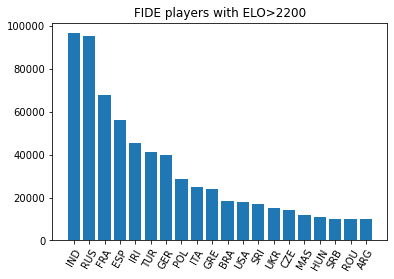

In [24]:
country_numb = players["country"].value_counts()
top_20 = country_numb.head(20)
plt.bar(top_20.index, top_20)
plt.xticks(rotation=60)
plt.title("FIDE chess players by country")#vertical x labels for better reading

Uhm, maybe we do not need to look to all register players, but just pretty strong players.
We can perform it filtering by ELO score (ELO is a method for calculating the relative
skill levels of players in zero-sum games such as chess.).
So we need to melt our data with monthly rank data.
We do not have data for all months so, firstly we will do a year mean

In [27]:
year_group = rank.groupby(by=[rank["date"].dt.year, rank["id"]])
year_group.groups

{(2001, 100013): [2212, 20032, 38157], (2001, 100021): [12196, 30389, 48541], (2001, 100030): [13191], (2001, 100048): [966], (2001, 100072): [106, 17827, 35931], (2001, 100080): [1449, 19227, 37345], (2001, 100099): [4766, 22691, 40815], (2001, 100102): [2580, 20406, 38536], (2001, 100110): [13155, 31373, 49529], (2001, 100129): [4948, 22880, 41005], (2001, 100137): [16997, 35361, 53523], (2001, 100153): [11257, 29424, 47568], (2001, 100161): [12885, 31099, 49252], (2001, 100170): [12888], (2001, 100188): [13754, 31988, 50145], (2001, 100196): [14383, 32647, 50816], (2001, 100200): [4137, 22040, 40169], (2001, 100218): [1683, 19473, 37597], (2001, 100226): [3771, 21659, 39784], (2001, 100234): [4837, 22767, 40891], (2001, 100242): [12546, 30755, 48905], (2001, 100250): [14219, 32469, 50636], (2001, 100269): [15167, 33455, 51627], (2001, 100277): [5244, 23198, 41337], (2001, 100285): [3696, 31871, 50028], (2001, 100307): [11172, 29329, 47479], (2001, 100315): [11824, 30006, 48155], (20




print(players)
del(rank["name"]) #we already have the name
#process_players()
#collect_data(download=False)


print(players["country"].value_counts())
joined = pd.merge(players, rank, how='inner', on='id')
#joined = joined[joined["birth_year"]!=0]
#print(joined.head())
print(joined)
